# Run simulation

In [1]:
# Define parameters to run the notebook here
C = 0.015
Gc = 0.1
ggap = 0.63
gsyn = 0.55

# Limit cycle. Oscillation is seen.
"""
C = 0.015
Gc = 0.1
ggap = 1.0
gsyn = 1.50

Elapsed time: 3.71s
Dominant period: 2.00
Dimensionality: 1.53
Dominant amplitude: 230.41
Dominant amplitude convergence: 1.00
"""

# Focus. The amplitude keeps decreasing.
"""
C = 0.002
Gc = 0.7
ggap = 1.0
gsyn = 1.0

Elapsed time: 0.85s
Dominant period: 4.99
Dimensionality: 1.91
Dominant amplitude: 0.02
Dominant amplitude convergence: 0.62
"""

# Stable node. 
"""
C = 0.015
Gc = 0.1
ggap = 0.0
gsyn = 0.0
"""

# Not sure what this is. It's like oscillation, but the oscillations
# also oscillate at a higher scale. I think this means there is a high-D limit cycle?
"""
C = 0.015
Gc = 0.1
ggap = 0.875
gsyn = 1.5
"""

# Looks like stable, but top PC shows same-center, but amplitude-varying oscillation
# If want to find the culprit neuron, need to find highest PC weight
"""
C = 0.015
Gc = 0.1
ggap = 0.0789
gsyn = 1.1842
"""

# Oscillation, but PC1 keeps increasing in amplitude.
"""
C = 0.015
Gc = 0.1
ggap = 0.1579
gsyn = 0.8684
"""

# Action potential
"""
C = 0.015
Gc = 0.1
ggap = 0.1579
gsyn = 1.2632
"""

# Lumpy, non-convergent results.
# TODO: Keep simulating. what do they look like in the long run?
"""
ggap 0.23684210526315788, gsyn 0.07894736842105263
ggap 0.23684210526315788, gsyn 0.23684210526315788
"""

'\nggap 0.23684210526315788, gsyn 0.07894736842105263\nggap 0.23684210526315788, gsyn 0.23684210526315788\n'

In [2]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')

start_time = time.time()
all_dynamics = simulate_until_stable(C, Gc, ggap, gsyn)
elapsed_time = time.time() - start_time

Loading saved results from pickle file cached_notebook_results/cached_simulation_C=0.015_Gc=0.1_ggap=0.63_gsyn=0.55


# Simulation key statistics

In [3]:
last_n = 5000
n = all_dynamics.shape[0]
last_dynamics = all_dynamics[-last_n:,:]
pca = PCA()

# Perform mean-centering before PCA
X = last_dynamics - last_dynamics.mean(axis= 0)
projected_X = pca.fit_transform(last_dynamics)
dom_mode = projected_X[:,0]
dom_amplitude = get_amplitude(dom_mode)
dom_amplitude_diff_raw, dom_amplitude_diff_scaled = get_amplitude_differences(dom_mode)
dom_period = get_period(dom_mode)

eigen_vals = get_eigenvalues_from_pca(pca, last_n)
dimensionality = get_dimensionality(eigen_vals)
print("Elapsed time: {0:.2f}s".format(elapsed_time))
print("Dominant period: {0:.2f}".format(dom_period))
print("Dominant amplitude: {0:.2f}".format(dom_amplitude))
print("Dominant amplitude diff raw: {0:.2f}".format(dom_amplitude_diff_raw))
print("Dominant amplitude diff scaled: {0:.2f}".format(dom_amplitude_diff_scaled))
print("Dimensionality: {0:.2f}".format(dimensionality))

Elapsed time: 0.08s
Dominant period: 2.63
Dominant amplitude: 482.52
Dominant amplitude diff raw: 0.19
Dominant amplitude diff scaled: 0.00
Dimensionality: 1.93


# Simulation summarized dynamics

Text(0.5, 1.0, 'Top 2 PCs on entire run')

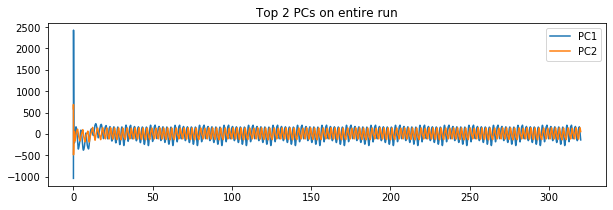

In [4]:
all_X = all_dynamics - all_dynamics.mean(axis= 0)
projected_all_X = pca.fit_transform(all_dynamics)
times = np.arange(0, n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_all_X[:,0], label = "PC1")
ax.plot(times, projected_all_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs on entire run")

Text(0.5, 1.0, 'Top 2 PCs in the last moments before convergence')

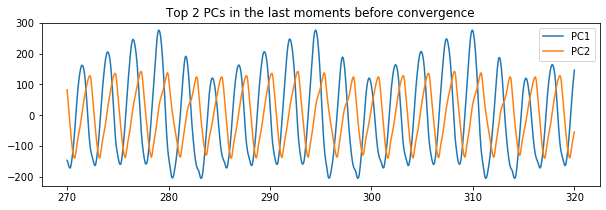

In [5]:
times = np.arange((n - last_n) * 0.01, n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_X[:,0], label = "PC1")
ax.plot(times, projected_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs in the last moments before convergence")

Text(0.5, 0.98, 'Actual neuron, entire dynamics')

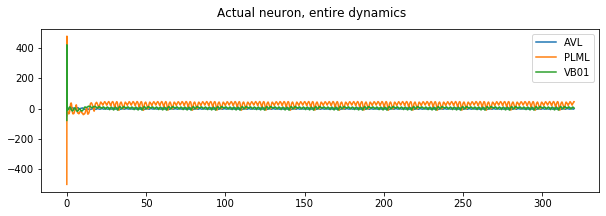

In [19]:
# Plot initial dynamics
# AVL = interneuron. PLML = sensory neuron. VB01 = motor neuron.
fig = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics, neuron_metadata_collection)
fig.suptitle("Actual neuron, entire dynamics")

Text(0.5, 0.98, 'Actual neuron, half dynamics')

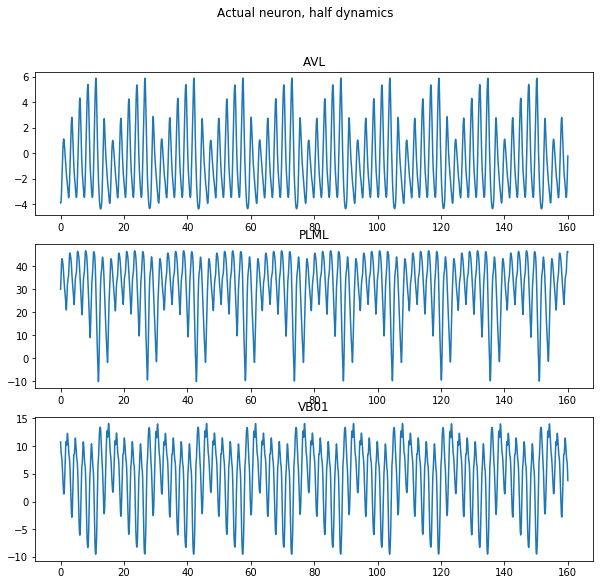

In [20]:
# Plot last half
fig = plot_saved_dynamics(['AVL', 'PLML', 'VB01'], all_dynamics[int(-n/2):,], neuron_metadata_collection)
fig.suptitle("Actual neuron, half dynamics")